In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file

df = pd.read_csv('bikes.csv')

In [3]:

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# checking the shape of dataframe

df.shape

(17379, 17)

In [5]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [7]:
# Check the head of the dataset

df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# dropping the unwanted columns
df.drop(['rec_id','datetime','casual','registered'],axis=1,inplace=True)
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  int64  
 1   year               17379 non-null  int64  
 2   month              17379 non-null  int64  
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  int64  
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  int64  
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


## Data Preparation

In [10]:
#Typecast
df['season'] = df.season.astype('category')
df['year'] = df.year.astype('category')
df['month'] = df.month.astype('category')
df['hour'] = df.hour.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')

In [11]:
df.dtypes

season               category
year                 category
month                category
hour                 category
is_holiday           category
weekday              category
is_workingday        category
weather_condition    category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
total_count             int64
dtype: object

## OHE

In [12]:
df = pd.get_dummies(df)

In [13]:
df.shape

(17379, 62)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 17379 non-null  float64
 1   atemp                17379 non-null  float64
 2   humidity             17379 non-null  float64
 3   windspeed            17379 non-null  float64
 4   total_count          17379 non-null  int64  
 5   season_1             17379 non-null  bool   
 6   season_2             17379 non-null  bool   
 7   season_3             17379 non-null  bool   
 8   season_4             17379 non-null  bool   
 9   year_0               17379 non-null  bool   
 10  year_1               17379 non-null  bool   
 11  month_1              17379 non-null  bool   
 12  month_2              17379 non-null  bool   
 13  month_3              17379 non-null  bool   
 14  month_4              17379 non-null  bool   
 15  month_5              17379 non-null 

In [15]:
#Define X and y
X = df.drop('total_count', axis=1)
y = df['total_count']

### Splitting the Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13903, 61)
(3476, 61)
(13903,)
(3476,)


## Scaling

In [18]:
scaler = MinMaxScaler()

## Scale only these features

num_vars = ['temp','atemp','humidity','windspeed']


X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [19]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lm.predict(X_test)

dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfn.head()

,Actual,Predicted
12830,425,451.5
8688,88,167.5
7091,4,3.5
12230,526,430.5
431,13,-69.5


Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

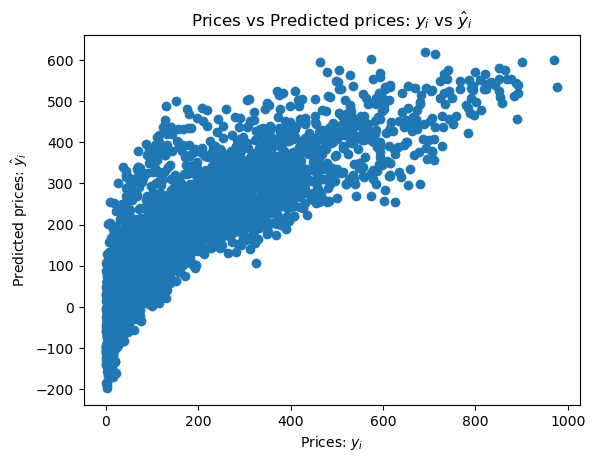

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [22]:
#rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)


rmse = mean_squared_error(y_test, y_pred,squared=False)
print('MSE using linear regression is::',rmse)

rsq  = r2_score(y_test, y_pred)
print('R-Squared using linear regression is::',rsq)

MSE using linear regression is:: 100.47498529353128
R-Squared using linear regression is:: 0.6811908564057529


In [23]:
import statsmodels.api as sm

X_train_lm_1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lr_1.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# 3d Hyperplane

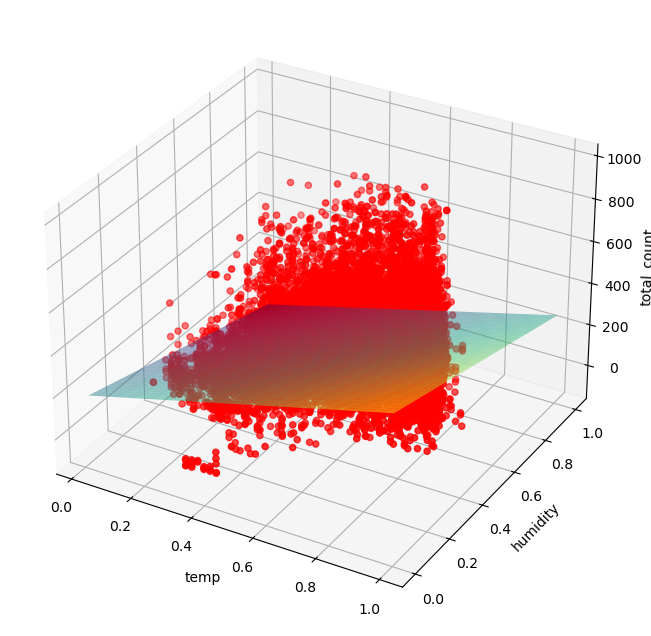

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Choose two independent features
feature1 = 'temp'
feature2 = 'humidity'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df[feature1], df[feature2], df['total_count'], c='r', marker='o', label='Data Points')

# Fit a linear regression model
model = LinearRegression()
X = df[[feature1, feature2]]
y = df['total_count']
model.fit(X, y)

# Create a meshgrid for the regression plane
x1_range = np.linspace(min(df[feature1]), max(df[feature1]), 100)
x2_range = np.linspace(min(df[feature2]), max(df[feature2]), 100)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
Y_mesh = model.intercept_ + model.coef_[0] * X1_mesh + model.coef_[1] * X2_mesh

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Y_mesh, alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('total_count')

# Show the plot
plt.show()

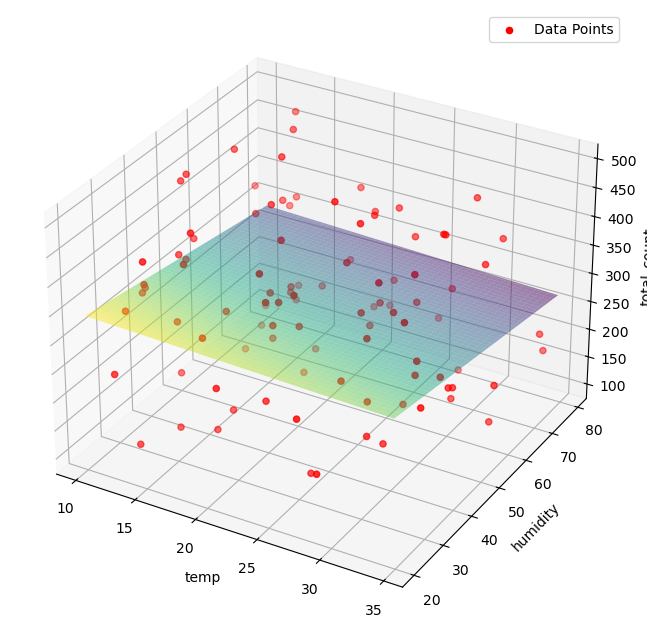

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Replace with your actual DataFrame
# Example data
np.random.seed(42)
data = {
    'temp': np.random.uniform(10, 35, 100),
    'humidity': np.random.uniform(20, 80, 100),
    'total_count': np.random.uniform(100, 500, 100)
}
df = pd.DataFrame(data)

# Choose two independent features
feature1 = 'temp'
feature2 = 'humidity'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df[feature1], df[feature2], df['total_count'], c='r', marker='o', label='Data Points')

# Fit a linear regression model
model = LinearRegression()
X = df[[feature1, feature2]]
y = df['total_count']
model.fit(X, y)

# Create a meshgrid for the regression plane
x1_range = np.linspace(min(df[feature1]), max(df[feature1]), 100)
x2_range = np.linspace(min(df[feature2]), max(df[feature2]), 100)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
Y_mesh = model.intercept_ + model.coef_[0] * X1_mesh + model.coef_[1] * X2_mesh

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Y_mesh, alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('total_count')

# Show the plot
plt.legend()
plt.show()
